#計算機程式設計二
#第十三週上課內容
## Standard Library
## Graph

### C++ Standard Library

這次的主題是透過解題，介紹如何使用一些 standard libary 裡面常用的資料型態和函數。
***
### map
首先是解 Word Count 這個題目。題目給的 sample input 和 sample output 分別是
```
Hello World Bye World Hello Hadoop Goodbye Hadoop
```
和
```
Bye 1
Goodbye 1
Hadoop 2
Hello 2
World 2  
```

這個題目的原始目標，是要大家實作 `class WordCount`，其中關鍵的函數包括 `readWords` `sortWords` `countWords` `dumpResult`，都有助於複習上學期學過的字串處理和字串排序，請大家確實地練習。

不過，我們在這裡為了介紹 standard library，所以就直接用 `map` 來寫 (不是這題原本假設你該採用的寫法)。一開始要
```
#include <map>
```
，然後產生一個資料結構
```
map<string, int> WORDS;
```
，用來記錄從 `字串` 到 `整數` 的對應關係：尖括號的第一個欄位是指 key,第二個欄位是 value，而 map 就是要記錄從 key 到 value 的對應關係，在這裡就是 `string` 到 `int`。

由於 `map` 裡面的資料，預設就會以 key 來排序，所以對於這題作業來說，只要把 `WORDS` 建好，排序就自動完成了。所以其實我們只需要寫 `readWords`，當讀取到一個新的字串，先用 `WORDS.count` 查詢是否已經存在 (`count` 是 `0`表示不存在，`1`表示存在)，如果不存在，就放入 `WORDS` 裡面，並且把 value 設為 `1`。如果原本就已存在，則把原來的 value 值再加一。

資料都讀取完並且存入 map 之後，只需要用迴圈 (用 range-based for loop)，把 map 裡面的資料依序取出來就行了。
```
	for (auto& i : WORDS)
        std::cout << i.first << " " << i.second << "\n";
```

其中 `.first` 會取得 key，`.second` 則會取得對應的 value。

底下是完整的程式碼：

In [ ]:
%%writefile wordcount.cpp
#include <iostream>
#include <string>
#include <map>

using namespace std;

class WordCount
{
public:
    WordCount(){};
    ~WordCount(){};
    /**
    read word into 'words' array
    and count words number 'numberOfTotalWords' at same time
    **/
    void readWords();
    /**
    sort words in the 'words' array in the dictionary order.
    **/
    void sortWords();
    /**
    find out number of different words and store in 'numberOfDiffWords'
    and put different words in string array 'diffwords'

    using the 'diffwords' array to count each words appear times
    and put in 'counting'
    **/
    void countWords();

    /**
    print out the result in format:
    <words><space><appear times>
    **/
    void dumpResult();

private:
    static const int numberOfMaxWords=65536;

    string words[numberOfMaxWords]; ///store the input article
    int numberOfTotalWords;         /// the total number of words

    string *diffwords;     /// store the pointer to different words
    int numberOfDiffWords; /// the number of different words
    int *counting;         /// counts for different words
};

std::map<string, int> WORDS;

void WordCount::readWords()
{
    string str;
    while (cin>>str) {
        if (WORDS.count(str)==0) {
            WORDS[str] = 1;
        } else {
            WORDS[str] += 1;
        }
    }
}

void WordCount::sortWords() { }
void WordCount::countWords() { }

void WordCount::dumpResult()
{
    for (auto& i : WORDS)
        std::cout << i.first << " " << i.second << "\n";
}

int main()
{
    WordCount wc;
    wc.readWords();
    wc.sortWords();
    wc.countWords();
    wc.dumpResult();
    return 0;
}

Writing wordcount.cpp


In [ ]:
%%writefile wordcount_testcase
Hello World Bye World Hello Hadoop Goodbye Hadoop

Writing wordcount_testcase


In [ ]:
!cat wordcount_testcase

Hello World Bye World Hello Hadoop Goodbye Hadoop


In [ ]:
%%shell
g++ wordcount.cpp -o wordcount -std=c++1z
./wordcount < wordcount_testcase

Bye 1
Goodbye 1
Hadoop 2
Hello 2
World 2


***
### list

有一題 OJ 題目是練習 linked list，依照題目的要求，補上程式碼之後，大概類似底下這樣
```c++
#ifndef FUNCTION_H
#define FUNCTION_H
#include <iostream>
class ListNode
{
    friend class OWList; //make OWList a friend
    friend class TWList; //make TWList a friend

public:
    ListNode( const int &info ) //constructor to create [data]->.
    : data{info}, nextPtr{nullptr}
    {
    } //end ListNode constructor

private:
    int data; //data
    ListNode *nextPtr; // next node in list
}; //end class ListNode


class OWList
{
public:
    //default constructor
    OWList(): firstPtr{nullptr}, lastPtr{nullptr} { }
    //destructor
    ~OWList() {
        while (!isEmpty())
            removeFromFront();
    }
    //insert node at front of list
    void insertAtFront( const int &value ) {
        ListNode *ln = new ListNode(value);
        ln->nextPtr = firstPtr;
        firstPtr = ln;
        if (lastPtr==nullptr) lastPtr = firstPtr;
    }
    //remove node from front of list
    void removeFromFront() {
        if (firstPtr!=nullptr) {
            ListNode *ln = firstPtr;
            firstPtr = ln->nextPtr;
            ln->nextPtr = nullptr;
            delete ln;
            if (firstPtr==nullptr)
                lastPtr = nullptr;
        }
    }
    //is List empty?
    bool isEmpty() const {
        return (firstPtr==nullptr);
    }
    //display contents of List
    void print() const {
        ListNode *p = firstPtr;
        while (p!=nullptr) {
            if (p==lastPtr)
                std::cout<<p->data << "\n";
            else
                std::cout << p->data << " ";
            p = p->nextPtr;
        }
    }

protected:
    ListNode *firstPtr; //pointer to first node
    ListNode *lastPtr;  //pointer to last node

}; // end class List

class TWList:public OWList
{
public:
    //default constructor
    TWList()
    :OWList()
    {
        /*It will still work correctly if you omit the constructor call of the base
          class in the above member initializer list. The compiler will invoke this
          default constructor of OWList implicitly.*/
    }
    //destructor
    ~TWList()
    {
        /*You don't need to delete the list again because the compiler
          will invoke the destructor of the base class OWList to do this.*/
    }
    //insert node at back of list
    void insertAtBack( const int &value ) {
        ListNode* ln = new ListNode(value);
        if (lastPtr!=nullptr) {
            lastPtr->nextPtr = ln;
            lastPtr = ln;
        } else {
            lastPtr = ln;
            firstPtr = lastPtr;
        }

    }
    //delete node from back of list
    void removeFromBack() {
        if (lastPtr!=nullptr && firstPtr!=nullptr) {
            ListNode *p = nullptr;
            ListNode *q = firstPtr;
            while (q!=lastPtr) {
                p = q;
                q = q->nextPtr;
            }
            if (p==nullptr) {
                delete lastPtr;
                lastPtr = firstPtr = nullptr;
            } else {
                delete q;
                p->nextPtr = nullptr;
                lastPtr = p;
            }
        }
    }

};
#endif
```

如果是直接用 `list`，則是類似底下的程式碼。先是 `#include <list>`，由於 `list` 支援雙向操作，所以可以 `push_front` `push_back` `pop_front` `pop_back`。


In [ ]:
%%writefile list.h

#ifndef FUNCTION_H
#define FUNCTION_H
#include <iostream>
class ListNode
{
    friend class OWList; //make OWList a friend
    friend class TWList; //make TWList a friend

public:
    ListNode( const int &info ) //constructor to create [data]->.
    : data{info}, nextPtr{nullptr}
    {
    } //end ListNode constructor

private:
    int data; //data
    ListNode *nextPtr; // next node in list
}; //end class ListNode


class OWList
{
public:
    //default constructor
    OWList();
    //destructor
    ~OWList();
    //insert node at front of list
    void insertAtFront( const int &value );
    //remove node from front of list
    void removeFromFront();
    //is List empty?
    bool isEmpty() const ;
    //display contents of List
    void print() const ;

protected:
    ListNode *firstPtr; //pointer to first node
    ListNode *lastPtr;  //pointer to last node

}; // end class List

class TWList:public OWList
{
public:
    //default constructor
    TWList()
    :OWList()
    {
        /*It will still work correctly if you omit the constructor call of the base
          class in the above member initializer list. The compiler will invoke this
          default constructor of OWList implicitly.*/
    }
    //destructor
    ~TWList()
    {
        /*You don't need to delete the list again because the compiler
          will invoke the destructor of the base class OWList to do this.*/
    }
    //insert node at back of list
    void insertAtBack( const int &value ) ;
    //delete node from back of list
    void removeFromBack() ;

};

#include <list>
using namespace std;
list<int> dlist;
OWList::OWList()
{
}
OWList::~OWList()
{
    dlist.clear();
}
void OWList::insertAtFront( const int &value )
{
    dlist.push_front(value);
}
void OWList::removeFromFront()
{
    if (!dlist.empty())
        dlist.pop_front();
}
bool OWList::isEmpty() const
{
    return dlist.empty();
}
void OWList::print() const
{
    if (!dlist.empty()) {
        int first = dlist.front();
        cout << first;
        dlist.pop_front();
        for (auto n: dlist) {
            cout << " " << n ;
        }
        dlist.push_front(first);
    }
    cout << endl;
}
void TWList::insertAtBack( const int &value )
{
    dlist.push_back(value);
}
void TWList::removeFromBack()
{
    if (!dlist.empty())
        dlist.pop_back();
}

#endif

Writing list.h


In [ ]:
%%writefile list.cpp
#include <iostream>
#include <string>
#include "list.h"
using namespace std;
int main()
{
    TWList integerList;
    int command;
    int value; // store node value

    while (cin >> command)
    {
        switch(command)
        {
        case 1: // insert at beginning
            cin >> value;
            integerList.insertAtFront(value);
            break;
        case 2: // insert at end
            cin >> value;
            integerList.insertAtBack(value);
            break;
        case 3: // remove from beginning
            integerList.removeFromFront();
            break;
        case 4: // remove from end
            integerList.removeFromBack();
            break;
        }
    }
    integerList.print();
    cout<<endl;
}


Writing list.cpp


In [ ]:
%%writefile list_testcase
    1 300
    2 100
    2 400
    1 500
    2 800
    1 600
    4

Overwriting list_testcase


In [ ]:
%%shell
g++ list.cpp -o list -std=c++1z
./list < list_testcase

600 500 300 100 400




### 猜數字

這個範例要用 C++ 寫出猜數字程式，使用者心中選一個由四個不同數字組成的字串，然後電腦會開始猜，使用者依據電腦猜的答案，提供 ?A?B 的提示。 A 代表在相同位置有正確的數字， B 則代表有整確的數字出現但是位置不對。例如答案是 1234 但是猜 3174，則要回應 1A2B，因為有一個數字 4 的位置正確，所以是 1A，然後另外兩個數字 1 和 3 也有出現，不過位置錯了，所以是 2B。

首先要規劃如何記錄可能的答案，我們可以用 `string` 來表達每個四位數，然後放在把所有可能的四位數放在 `vector` 中。
```c++
vector<string> solutions;
```

接下來要把所有可能的答案都產生出來，
```c++
	    for (int i=0; i<10000; i++) {
		    stringstream os;
		    os << setfill('0') << setw(4) << i;
		    solutions.push_back(os.str());
        }
```
用迴圈跑過所有 0 到 9999 整數。把整數寫入 `stringstream os` 中，並且設定格式為四個字元、不足的前面補零。用 `os.str()` 取出已寫入 stream 中的字串，然後用 `push_back` 放入 vector `solutions` 中。迴圈做完後，`solutions` 裡面就會有所可能的四位數字串，當中也包含了像是 1122 這樣有重複數字的字串。為了過濾掉不符規定的(有重複數字的)字串，我們可以用 `erase` 搭配 `remove_if`。
```c++
	    solutions.erase(remove_if(solutions.begin(), solutions.end(),
	    [](string& s) {
		    for (int j=1; j<4; ++j)
			    for (int k=0; k<j; ++k)
				    if (s[j]==s[k]) return true;
		    return false;
	    }), solutions.end());
```

`erase` 和 `remove_if` 的組合，是慣用的寫法。
先來看 `remove_if` 的作用。`remove_if` 需要三個參數，前兩個分別是 vector 的 begin() 和 end()，第三個則是用來過濾的條件。過濾的條件我們可以用 lambda function 來寫。我們造了一個 labmda function，能夠檢查一個字串當中，是否包含重複的數字，如果有的話，labmada function 就傳回 `true`，如果數字都不相同，就傳回 `false`。經過篩選之後，vector 之中所有符合過濾條件的元素，都會被移到後面，不符合條件的(可以留下來的)，則會推到 vector 的前面，而`remove_if` 本身會傳回搬移之後，該留下來的元素的結束位置 (最後一個該留下的元素的下一個位置)。所以如果我們再用 `erase` 從那個位置開始，一路清除到原本的 `end()`，就會把那些該被過濾的元素從 vector 當中移除。

同樣的做法，我們可以隨機從 solutoins 中挑選一個可能的答案，然後依據 ?A?B 的結果，把不符合條件的字串剔除。

```c++
    void trim(int A, int B) {
        string cur = my_guess;
		solutions.erase(remove_if(solutions.begin(), solutions.end(),
		[=](string& str) {
            int AA=A, BB=B;
			for (int j=0; j<4; ++j) {
			    if (str[j]==cur[j]) --AA;
				for (int k=0; k<4; ++k)
					if (j!=k&&str[j]==cur[k]) --BB;
            }
            if (AA==0 && BB==0) return false;
			else return true;
		}), solutions.end());
    }
```


完整的程式碼如下


In [ ]:
%%writefile test.cpp
#include <iostream>
#include <string>
#include <sstream>
#include <vector>
#include <iomanip>
#include <algorithm>

using namespace std;
int main()
{
  vector<string> solutions;
  for (int i=0; i<10000; i++) {
    stringstream os;
    os << setfill('0') << setw(4) << i;
    solutions.push_back(os.str());
  }

  solutions.erase(

       remove_if(solutions.begin(), solutions.end(),
        [](string& s) {
            for (int j=1; j<4; ++j)
                for (int k=0; k<j; ++k)
                    if (s[j]==s[k]) return true;
            return false;
        }
        ),

        solutions.end());

  cout << solutions.size() << "\n";
}

Overwriting test.cpp


In [ ]:
%%shell
g++ test.cpp -o test -std=c++1z
./test

5040


In [ ]:
%%writefile guess_1.cpp
#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
#include <vector>
#include <algorithm>
#include <random>

using namespace std;

class GuessNumber {
public:
    GuessNumber() {
      rng = mt19937(random_device{}()); //random number generator

	    for (int i=0; i<10000; i++) {
		    stringstream os;
		    os << setfill('0') << setw(4) << i;
		    solutions.push_back(os.str());
      }
	    solutions.erase(remove_if(solutions.begin(), solutions.end(),
	    [](string& s) {
		    for (int j=0; j<4; ++j)
			    for (int k=0; k<j; ++k)
				    if (s[j]==s[k]) return true;
		    return false;
	    }), solutions.end());
    }

    void trim(int A, int B) {
        string cur = my_guess;
		solutions.erase(
      remove_if(solutions.begin(), solutions.end(),
		[cur,A,B](string& str) {
            int AA=A, BB=B;
			for (int j=0; j<4; ++j) {
			    if (str[j]==cur[j]) --AA;
				for (int k=0; k<4; ++k)
					if (j!=k && str[j]==cur[k]) --BB;
      }
      if (AA==0 && BB==0) return false;
			else return true;
		}
    )
    , solutions.end());
    }

    string guess() {
        uniform_int_distribution<>dis(0,size()-1);
		    my_guess = solutions[dis(rng)];
		    return my_guess;
    }

    size_t size() {
        return solutions.size();
    }

    void show() {
        for (auto s: solutions)
            cout << s << endl;
    }

private:
	  mt19937 rng; // random number generator
    string my_guess;
    vector<string> solutions;
};
int main()
{

  GuessNumber gn;

	while (gn.size()>1) {
		cout << gn.guess() << endl;
		cout << "? A ? B" << endl;
		int A, B;
		cin >> A >> B;

		gn.trim(A, B);
		if (gn.size()<10) {
		    cout << "------" << endl;
		    gn.show();
		    cout << "------" << endl;
        }

        if (gn.size()==1) {
            cout << "I got it!" << endl;
            gn.show();
        }
        if (gn.size()==0)
            cout << "No way!" << endl;
	}
}


Overwriting guess_1.cpp


In [ ]:
%%shell
g++ guess_1.cpp -o guess_1 -std=c++1z
./guess_1

### 猜電腦「心裡想」的數字
我們還可以再進一步改寫，變成是使用者猜電腦的「腦中」想的數字。做法是先讓使用者輸入猜測的字串，然後試過所以可能的 ?A?B 的組合，看看哪一種狀況對使用者最不利，就答覆那一種 ?A?B。所謂最不利的狀況，就是只被刪去的不可能答案最少。也就是說，我們希望找到某一種 ?A?B 的狀況，使得當我們用 `trim` 把不符合的字串刪去之後，剩餘的 `solutions` 越多越好。基於這樣的做法，使用者需要猜測的次數應該會很多，因為不管怎麼猜，每次都會得到最差的 ?A?B 的答覆，能夠用來消去的線索最少。

底下是程式碼

In [ ]:
%%writefile guess_2.cpp
#include <iostream>
#include <iomanip>
#include <sstream>
#include <string>
#include <vector>
#include <algorithm>

using namespace std;

class GuessMyNumber {
public:
    GuessMyNumber() {
	    for (int i=0; i<10000; i++) {
		    stringstream os;
		    os << setfill('0') << setw(4) << i;
		    solutions.push_back(os.str());
        }
	    solutions.erase(remove_if(solutions.begin(), solutions.end(),
	    [](string& s) {
		    for (int j=0; j<4; ++j)
			    for (int k=0; k<j; ++k)
				    if (s[j]==s[k]) return true;
		    return false;
	    }), solutions.end());
    }
    vector<string> trim(int A, int B, string cur) {
        vector<string> sols{solutions};
		sols.erase(remove_if(sols.begin(), sols.end(),
		[=](string& str) {
            int AA=A, BB=B;
			for (int j=0; j<4; ++j) {
			    if (str[j]==cur[j]) --AA;
				for (int k=0; k<4; ++k)
					if (j!=k&&str[j]==cur[k]) --BB;
            }
            if (AA==0 && BB==0) return false;
			else return true;
		}), sols.end());
		return sols;
    }
    void set_solutions(vector<string> &sols)
    {
        solutions = sols;
    }
    size_t size() {
        return solutions.size();
    }
    void show() {
        for (auto s: solutions)
            cout << s << endl;
    }
private:
    vector<string> solutions;
};
int main()
{

    GuessMyNumber gn;
    int maxguess = 8;
	while (gn.size()>0 && maxguess-->0) {
	    cout << "Your guess: ";
	    string guess;
	    cin >> guess;
      vector<string> best_sols;
      int bestA=0, bestB=0;
		  for (int A=0; A<=4; ++A) {
		    for (int B=0; B<=4-A; ++B) {
		        vector<string> sols = gn.trim(A,B,guess);
		        if (best_sols.size()<sols.size()) {
		            best_sols = sols;
		            bestA = A;
		            bestB = B;
                }
		    }
		  }
		  gn.set_solutions(best_sols);
      cout << bestA << "A" << bestB << "B" << endl;

      if (gn.size()==0) {
          cout << "You got it!" << endl;
      } else if (gn.size()<20) {
          cout << "-----" << endl;
          cout << "Hint:" << endl;
          gn.show();
          cout << "-----" << endl;
      }
	}
}

Overwriting guess_2.cpp


In [ ]:
%%shell
g++ guess_2.cpp -o guess_2 -std=c++1z
./guess_2

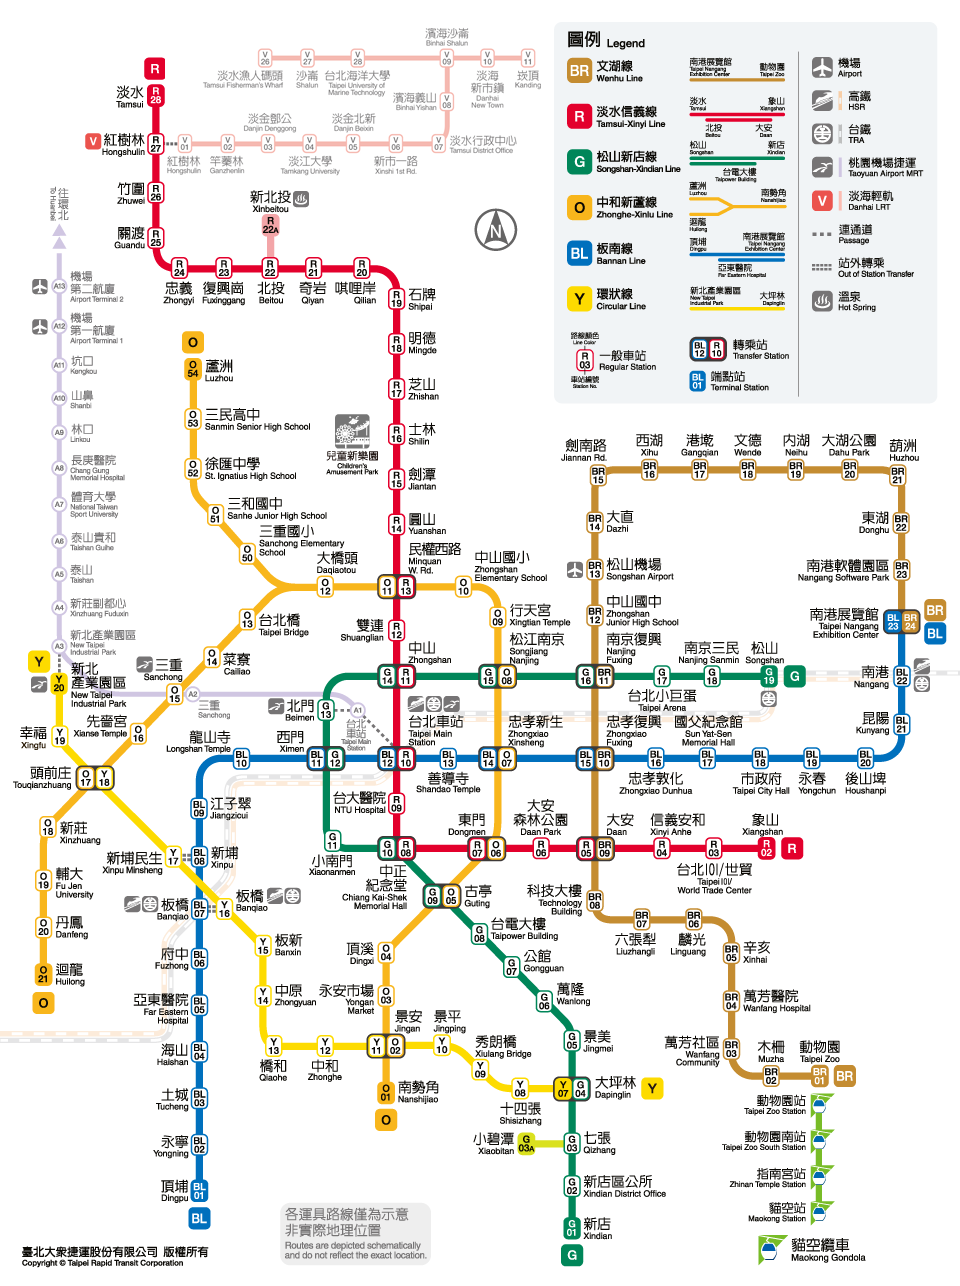

搜尋「臺北捷運系統相鄰兩站間之行駛時間、停靠站時間」
可以找到 政府資料開放平臺提供的 csv 檔案
https://data.gov.tw/en/datasets/128420

下載後擷取出相鄰兩站的列表



In [ ]:
%%writefile mrt.txt
捷運淡水站	捷運紅樹林站
捷運紅樹林站	捷運竹圍站
捷運竹圍站	捷運關渡站
捷運關渡站	捷運忠義站
捷運忠義站	捷運復興崗站
捷運復興崗站	捷運北投站
捷運北投站	捷運奇岩站
捷運奇岩站	捷運唭哩岸站
捷運唭哩岸站	捷運石牌站
捷運石牌站	捷運明德站
捷運明德站	捷運芝山站
捷運芝山站	捷運士林站
捷運士林站	捷運劍潭站
捷運劍潭站	捷運圓山站
捷運圓山站	捷運民權西路站
捷運民權西路站	捷運雙連站
捷運雙連站	捷運中山站
捷運中山站	捷運台北車站
捷運台北車站	捷運台大醫院站
捷運台大醫院站	捷運中正紀念堂站
捷運中正紀念堂站	捷運東門站
捷運東門站	捷運大安森林公園站
捷運大安森林公園站	捷運大安站
捷運大安站	捷運信義安和站
捷運信義安和站	捷運台北101/世貿站
捷運台北101/世貿站	捷運象山站
捷運北投站	捷運奇岩站
捷運奇岩站	捷運唭哩岸站
捷運唭哩岸站	捷運石牌站
捷運石牌站	捷運明德站
捷運明德站	捷運芝山站
捷運芝山站	捷運士林站
捷運士林站	捷運劍潭站
捷運劍潭站	捷運圓山站
捷運圓山站	捷運民權西路站
捷運民權西路站	捷運雙連站
捷運雙連站	捷運中山站
捷運中山站	捷運台北車站
捷運台北車站	捷運台大醫院站
捷運台大醫院站	捷運中正紀念堂站
捷運中正紀念堂站	捷運東門站
捷運東門站	捷運大安森林公園站
捷運大安森林公園站	捷運大安站
捷運松山站	捷運南京三民站
捷運南京三民站	捷運台北小巨蛋站
捷運台北小巨蛋站	捷運南京復興站
捷運南京復興站	捷運松江南京站
捷運松江南京站	捷運中山站
捷運中山站	捷運北門站
捷運北門站	捷運西門站
捷運西門站	捷運小南門站
捷運小南門站	捷運中正紀念堂站
捷運中正紀念堂站	捷運古亭站
捷運古亭站	捷運台電大樓站
捷運台電大樓站	捷運公館站
捷運公館站	捷運萬隆站
捷運萬隆站	捷運景美站
捷運景美站	捷運大坪林站
捷運大坪林站	捷運七張站
捷運七張站	捷運新店區公所站
捷運新店區公所站	捷運新店站
捷運松山站	捷運南京三民站
捷運南京三民站	捷運台北小巨蛋站
捷運台北小巨蛋站	捷運南京復興站
捷運南京復興站	捷運松江南京站
捷運松江南京站	捷運中山站
捷運中山站	捷運北門站
捷運北門站	捷運西門站
捷運西門站	捷運小南門站
捷運小南門站	捷運中正紀念堂站
捷運中正紀念堂站	捷運古亭站
捷運古亭站	捷運台電大樓站
捷運七張站	捷運小碧潭站
捷運北投站	捷運新北投站
捷運南港展覽館站	捷運南港站
捷運南港站	捷運昆陽站
捷運昆陽站	捷運後山埤站
捷運後山埤站	捷運永春站
捷運永春站	捷運市政府站
捷運市政府站	捷運國父紀念館站
捷運國父紀念館站	捷運忠孝敦化站
捷運忠孝敦化站	捷運忠孝復興站
捷運忠孝復興站	捷運忠孝新生站
捷運忠孝新生站	捷運善導寺站
捷運善導寺站	捷運台北車站
捷運台北車站	捷運西門站
捷運西門站	捷運龍山寺站
捷運龍山寺站	捷運江子翠站
捷運江子翠站	捷運新埔站
捷運新埔站	捷運板橋站
捷運板橋站	捷運府中站
捷運府中站	捷運亞東醫院站
捷運亞東醫院站	捷運海山站
捷運海山站	捷運土城站
捷運土城站	捷運永寧站
捷運永寧站	捷運頂埔站
捷運南港展覽館站	捷運南港站
捷運南港站	捷運昆陽站
捷運昆陽站	捷運後山埤站
捷運後山埤站	捷運永春站
捷運永春站	捷運市政府站
捷運市政府站	捷運國父紀念館站
捷運國父紀念館站	捷運忠孝敦化站
捷運忠孝敦化站	捷運忠孝復興站
捷運忠孝復興站	捷運忠孝新生站
捷運忠孝新生站	捷運善導寺站
捷運善導寺站	捷運台北車站
捷運台北車站	捷運西門站
捷運西門站	捷運龍山寺站
捷運龍山寺站	捷運江子翠站
捷運江子翠站	捷運新埔站
捷運新埔站	捷運板橋站
捷運板橋站	捷運府中站
捷運府中站	捷運亞東醫院站
捷運南港展覽館站	捷運南港軟體園區站
捷運南港軟體園區站	捷運東湖站
捷運東湖站	捷運葫洲站
捷運葫洲站	捷運大湖公園站
捷運大湖公園站	捷運內湖站
捷運內湖站	捷運文德站
捷運文德站	捷運港墘站
捷運港墘站	捷運西湖站
捷運西湖站	捷運劍南路站
捷運劍南路站	捷運大直站
捷運大直站	捷運松山機場站
捷運松山機場站	捷運中山國中站
捷運中山國中站	捷運南京復興站
捷運南京復興站	捷運忠孝復興站
捷運忠孝復興站	捷運大安站
捷運大安站	捷運科技大樓站
捷運科技大樓站	捷運六張犁站
捷運六張犁站	捷運麟光站
捷運麟光站	捷運辛亥站
捷運辛亥站	捷運萬芳醫院站
捷運萬芳醫院站	捷運萬芳社區站
捷運萬芳社區站	捷運木柵站
捷運木柵站	捷運動物園站
捷運蘆洲站	捷運三民高中站
捷運三民高中站	捷運徐匯中學站
捷運徐匯中學站	捷運三和國中站
捷運三和國中站	捷運三重國小站
捷運三重國小站	捷運大橋頭站
捷運大橋頭站	捷運民權西路站
捷運民權西路站	捷運中山國小站
捷運中山國小站	捷運行天宮站
捷運行天宮站	捷運松江南京站
捷運松江南京站	捷運忠孝新生站
捷運忠孝新生站	捷運東門站
捷運東門站	捷運古亭站
捷運古亭站	捷運頂溪站
捷運頂溪站	捷運永安市場站
捷運永安市場站	捷運景安站
捷運景安站	捷運南勢角站
捷運迴龍站	捷運丹鳳站
捷運丹鳳站	捷運輔大站
捷運輔大站	捷運新莊站
捷運新莊站	捷運頭前庄站
捷運頭前庄站	捷運先嗇宮站
捷運先嗇宮站	捷運三重站
捷運三重站	捷運菜寮站
捷運菜寮站	捷運台北橋站
捷運台北橋站	捷運大橋頭站
捷運大橋頭站	捷運民權西路站
捷運民權西路站	捷運中山國小站
捷運中山國小站	捷運行天宮站
捷運行天宮站	捷運松江南京站
捷運松江南京站	捷運忠孝新生站
捷運忠孝新生站	捷運東門站
捷運東門站	捷運古亭站
捷運古亭站	捷運頂溪站
捷運頂溪站	捷運永安市場站
捷運永安市場站	捷運景安站
捷運景安站	捷運南勢角站
捷運新北產業園區站	捷運幸福站
捷運幸福站	捷運頭前庄站
捷運頭前庄站	捷運新埔民生站
捷運新埔民生站	捷運板橋站
捷運板橋站	捷運板新站
捷運板新站	捷運中原站
捷運中原站	捷運橋和站
捷運橋和站	捷運中和站
捷運中和站	捷運景安站
捷運景安站	捷運景平站
捷運景平站	捷運秀朗橋站
捷運秀朗橋站	捷運十四張站
捷運十四張站	捷運大坪林站

Writing mrt.txt


###假如想從 `內湖` 到 `小南門`，有哪些路線可行?

***

網路結構的資料儲存方式: 用 `map<string, set<string> >`

路徑: 用 `list<string>` 來記錄

算法:
- 不斷向前推進
- 指定某個起點 `src` 以及終點 `dst` 試著找可以到達的路徑
- 如果 `src` 等於 `dst`，那就不用再繼續找了，先看看目前已知的最佳路徑，和當前的路徑，哪一個比較短，傳回短的那條路徑
- 如果 `src` 還不等於 `dst`，就看看 `src` 的鄰站有哪些，只要鄰站不在已走過的路徑中，就試著叢鄰站繼續往前找 `dst`，並且持續更新目前最短路徑。
- 最終，應該會把全部可到達目的地的路徑都走過，然後留下最短的那條


完整程式碼如下

In [ ]:
%%writefile mrt_1.cpp
#include <iostream>
#include <fstream>
#include <map>
#include <set>
#include <list>
#include <algorithm>

using namespace std;

using Graph = map<string,set<string>>;
using Path = list<string>;

Path has_path(Graph &g, string src, string dst, Path path, Path best_path)
{
    if (src==dst) {
        path.push_back(dst);
        if (best_path.empty())
            return path;
        else if (path.size() < best_path.size())
            return path;
        else
            return best_path;
    }

    path.push_back(src);

    for (auto& n: g[src]) {
        if (find(path.begin(), path.end(), n) == path.end() )
            best_path = has_path(g, n, dst, path, best_path);
    }
    return best_path;
}


int main()
{
    ifstream fin;
    fin.open("mrt.txt");

    Graph mrt_graph;

    string dep, arv;
    while (fin >> dep) {
        fin >> arv;
        arv.erase(0, 6); // remove the starting characters "捷運"
        dep.erase(0, 6);
        mrt_graph[dep].insert(arv);  // one copy for each element
        mrt_graph[arv].insert(dep);
    }
    fin.close();

    /*
    int i=1;
    for (auto& v: mrt_graph) {
        for (auto& t: v.second) {
            cout << i++ << ":" << v.first << "-->" << t << endl;
        }
    }
    */

    Path p, bp; // empty list
    bp = has_path(mrt_graph, "內湖站", "小南門站", p, bp);
    for (auto &r: bp) {
        cout << r << "-->" ;
    }
    cout << endl;
}

Overwriting mrt_1.cpp


In [ ]:
%%shell
g++ mrt_1.cpp -o mrt_1 -std=c++1z
./mrt_1

內湖站-->文德站-->港墘站-->西湖站-->劍南路站-->大直站-->松山機場站-->中山國中站-->南京復興站-->忠孝復興站-->忠孝新生站-->東門站-->中正紀念堂站-->小南門站-->


***
另一種做法，是利用 queue 來把每個能夠往前拓展的路徑依序檢驗，像排隊一樣，先進來的先檢驗。只要隊伍中還有人在排，就繼續檢驗。

過程中我們需要記住 每個節點，以及從 `src` 到達該節點的路徑，這樣的資料用 `pair` 來儲存。

我們可以把全部找的路徑，都先放入一個用來計錄路徑的集合 `set<Path>` 裡面。設定一個上限，只要長度小於上限的路徑，都可以放進集合中。

In [ ]:
%%writefile mrt_2.cpp
#include <iostream>
#include <fstream>
#include <map>
#include <set>
#include <list>
#include <algorithm>
#include <queue>
#include <utility>

using namespace std;

using Graph = map<string,set<string>>;
using Path = list<string>;


set<Path> has_path(Graph g, string src, string dst, int limit)
{
    Path pa;
    pa.push_back(src);
    queue<pair<string,Path>> qq;
    pair<string,Path> src_path;
    src_path = make_pair(src, pa);
    qq.push( src_path );

    set<Path> sol;
    while (!qq.empty()) {
        pair<string,Path> pa;
        pa = qq.front();
        qq.pop();
        Path path;
        path = pa.second;
        for (auto n: g[pa.first]) {
            if (find(path.begin(), path.end(), n) == path.end() ) {
                Path tmp = path;
                tmp.push_back(n);
                if (n==dst) {
                    if (tmp.size()<limit)
                        sol.insert(tmp);
                } else {
                    pair<string,Path> tmp_path;
                    tmp_path = make_pair(n, tmp);
                    qq.push( tmp_path );
                }
            }
        }
    }

    return sol;
}

int main()
{
    ifstream fin;
    fin.open("mrt.txt");

    Graph mrt_graph;

    string dep, arv;
    while (fin >> dep) {
        fin >> arv;
        arv.erase(0, 6); // remove the starting characters "捷運"
        dep.erase(0, 6);
        mrt_graph[dep].insert(arv);
        mrt_graph[arv].insert(dep);
    }
    fin.close();

    set<Path> sbp;
    sbp = has_path(mrt_graph, "內湖站", "小南門站", 15);
    for (auto & sr: sbp) {
        for (auto &r: sr) {
            cout << r << "-->" ;
        }
        cout << endl;
    }
}

Overwriting mrt_2.cpp


In [ ]:
%%shell
g++ mrt_2.cpp -o mrt_2 -std=c++1z
./mrt_2

內湖站-->文德站-->港墘站-->西湖站-->劍南路站-->大直站-->松山機場站-->中山國中站-->南京復興站-->忠孝復興站-->忠孝新生站-->東門站-->中正紀念堂站-->小南門站-->
內湖站-->文德站-->港墘站-->西湖站-->劍南路站-->大直站-->松山機場站-->中山國中站-->南京復興站-->松江南京站-->中山站-->北門站-->西門站-->小南門站-->
內湖站-->文德站-->港墘站-->西湖站-->劍南路站-->大直站-->松山機場站-->中山國中站-->南京復興站-->松江南京站-->中山站-->台北車站-->西門站-->小南門站-->
內湖站-->文德站-->港墘站-->西湖站-->劍南路站-->大直站-->松山機場站-->中山國中站-->南京復興站-->松江南京站-->忠孝新生站-->東門站-->中正紀念堂站-->小南門站-->
